# Data analysis

In [3]:
import os
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 设置数据集路径
dataset_path = "RAVDESS Emotional speech audio"

# 获取所有音频文件
files = []#[f for f in os.listdir(dataset_path) if f.endswith(".wav")]
for root, dirs, filenames in os.walk(dataset_path):
    for filename in filenames:
        if filename.endswith(".wav"):
            files.append(os.path.join(root, filename))  # 保存完整路径

# 解析文件名，提取信息
data = []
for file in files:
    parts = file.split("-")
    # print(parts)
    emotion = int(parts[2])  # 提取情感类别
    intensity = int(parts[3])  # 提取强度（01-正常, 02-高强度）
    gender = "Male" if int(parts[6].split('.')[0]) % 2 == 1 else "Female"  # 根据说话者 ID 判断性别
    data.append([file, emotion, intensity, gender])


In [5]:
LABELS = {
    "01": "neutral",
    "02": "neutral",  # Merge "calm" into "neutral"
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",
    "07": "disgust",
    "08": "surprise"
}

In [10]:

# 转换为 DataFrame
df = pd.DataFrame(data, columns=["Filename", "Emotion", "Intensity", "Gender"])

# 统计数据分布
print(df["Emotion"].value_counts())  # 统计每种情感的数量
print(df["Gender"].value_counts())   # 统计性别分布
print('1')

Emotion
2    192
3    192
4    192
5    192
6    192
7    192
8    192
1     96
Name: count, dtype: int64
Gender
Male      720
Female    720
Name: count, dtype: int64
1


In [12]:
df["Emotion"] = df["Emotion"].astype(str).str.zfill(2)  # Ensure two-digit format
df["Emotion"] = df["Emotion"].map(LABELS)  # Apply mapping

In [13]:
print(df.head())

                                            Filename  Emotion  Intensity  \
0  RAVDESS Emotional speech audio\Actor_01\03-01-...  neutral          1   
1  RAVDESS Emotional speech audio\Actor_01\03-01-...  neutral          1   
2  RAVDESS Emotional speech audio\Actor_01\03-01-...  neutral          1   
3  RAVDESS Emotional speech audio\Actor_01\03-01-...  neutral          1   
4  RAVDESS Emotional speech audio\Actor_01\03-01-...  neutral          1   

  Gender  
0   Male  
1   Male  
2   Male  
3   Male  
4   Male  


In [14]:
df

,Filename,Emotion,Intensity,Gender
0,RAVDESS Emotional speech audio\Actor_01\03-01-...,neutral,1,Male
1,RAVDESS Emotional speech audio\Actor_01\03-01-...,neutral,1,Male
2,RAVDESS Emotional speech audio\Actor_01\03-01-...,neutral,1,Male
3,RAVDESS Emotional speech audio\Actor_01\03-01-...,neutral,1,Male
4,RAVDESS Emotional speech audio\Actor_01\03-01-...,neutral,1,Male
...,...,...,...,...
1435,RAVDESS Emotional speech audio\Actor_24\03-01-...,surprise,1,Female
1436,RAVDESS Emotional speech audio\Actor_24\03-01-...,surprise,2,Female
1437,RAVDESS Emotional speech audio\Actor_24\03-01-...,surprise,2,Female
1438,RAVDESS Emotional speech audio\Actor_24\03-01-...,surprise,2,Female


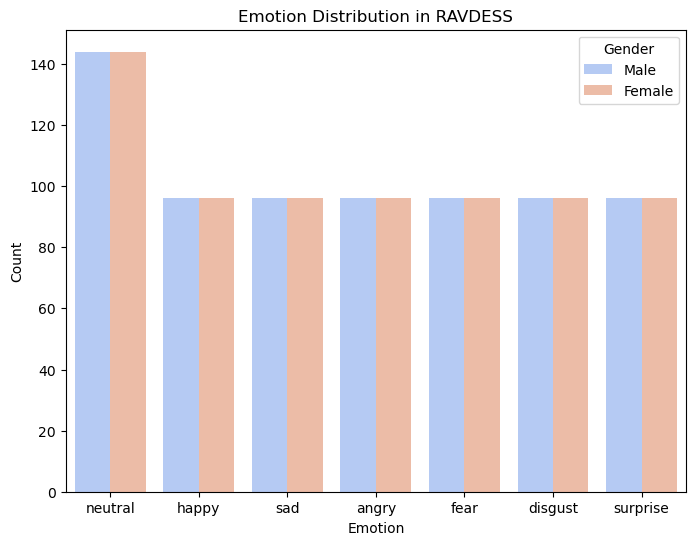

In [15]:


plt.figure(figsize=(8, 6))
sns.countplot(x="Emotion", hue="Gender", data=df, palette="coolwarm")
plt.title("Emotion Distribution in RAVDESS")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

# Speech feature extraction

In [16]:
def extract_mfcc(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc = np.mean(mfcc, axis=1)  # 对每帧特征取均值
    return mfcc

In [17]:
import librosa.display
import matplotlib.pyplot as plt

# 提取Mel Spectrogram
def extract_melspectrogram(file_path, sr=16000):
    y, sr = librosa.load(file_path, sr=sr)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return np.mean(mel_spec_db, axis=1)

# 提取其他音频特征
def extract_zero_crossing_rate(file_path, sr=16000):
    y, sr = librosa.load(file_path, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    return np.mean(zcr, axis=1)

In [ ]:
mfcc_features = []

# 处理所有音频文件并提取 MFCC 特征
mfcc_features = []
for file in files:
    mfcc = extract_mfcc(file)  # file 已经是完整的路径
    mel_spec = extract_melspectrogram(file)
    zcr = extract_zero_crossing_rate(file)
    
    feature_vector = np.concatenate((mfcc, mel_spec, zcr))
    mfcc_features.append(feature_vector)

# 转换为 DataFrame
mfcc_df = pd.DataFrame(mfcc_features)

# 假设情感标签与音频文件的顺序一致，或者你需要通过文件名或其他方式映射标签
mfcc_df["Emotion"] = df["Emotion"]  # 你可以根据实际的标签存储方式调整

# 打印提取的特征
print(mfcc_df.head())  # 查看前几行特征
print('111')

### Accuracy: 0.5648148148148148 version

In [86]:
X = []
y = []
X =  mfcc_df.drop(columns=["Emotion"])
y=mfcc_df.Emotion
X = np.array(X)
y = np.array(y)



###  Accuracy: 0.5555555555555556 version

In [124]:
import librosa
import numpy as np

# # 添加背景噪声
# def add_noise(data, noise_level=0.005):
#     noise = np.random.randn(len(data))
#     return data + noise_level * noise

# # 改变音高
# def change_pitch(y, sr, pitch_factor=2.0):
#     return librosa.effects.pitch_shift(y=y, sr=sr, n_steps=pitch_factor)

# # 改变播放速度
# def change_speed(y, speed_factor=1.1):
#     return librosa.effects.time_stretch(y, rate=speed_factor)

# # 随机裁剪音频
# def random_crop(y, crop_percent=0.9):
#     crop_length = int(len(y) * crop_percent)
#     start = np.random.randint(0, len(y) - crop_length)
#     return y[start:start+crop_length]
    
# def extract_features_with_augmentation(audio_file):
#     y, sr = librosa.load(audio_file, sr=None)
#     features = []

#     # 定义一个内部函数以减少重复代码
#     def extract_all_features(y):
#         stft = np.abs(librosa.stft(y))
#         mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=1)
#         chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=1)
#         mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=1)
#         contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T, axis=1)
#         tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).T, axis=1)
#         zcr = np.mean(librosa.feature.zero_crossing_rate(y).T, axis=0)
#         rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis=0)
#         rmse = np.mean(librosa.feature.rms(y=y).T, axis=0)

#         return np.hstack([mfccs, chroma, mel, contrast, tonnetz, zcr, rolloff, rmse])
#         # return np.hstack([mfccs, chroma, mel, contrast, tonnetz])

#     # 原始音频特征
#     features.append(extract_all_features(y))

#     # 添加不同增强数据的特征
#     y_noise = add_noise(y)
#     features.append(extract_all_features(y_noise))

#     y_pitch = change_pitch(y, sr, pitch_factor=2.0)
#     features.append(extract_all_features(y_pitch))

#     y_speed = change_speed(y, speed_factor=1.1)
#     features.append(extract_all_features(y_speed))

#     y_crop = random_crop(y)
#     features.append(extract_all_features(y_crop))

#     return features


def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    
    # 1. MFCC 特征
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    
    # 2. Chroma 特征
    stft = np.abs(librosa.stft(y))
    chroma = librosa.feature.chroma_stft(S=stft, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    
    # 3. Mel-spectrogram 特征
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_mean = np.mean(mel, axis=1)
    
    # 4. Spectral Contrast 特征
    contrast = librosa.feature.spectral_contrast(S=stft, sr=sr)
    contrast_mean = np.mean(contrast, axis=1)
    
    # 将所有特征拼接为一个一维向量
    # features = np.hstack([mfcc_mean, chroma_mean, mel_mean, contrast_mean])
    
    # 增强特征：逐步添加
    tonnetz_mean = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr), axis=1)
    zcr_mean = np.mean(librosa.feature.zero_crossing_rate(y), axis=1)
    rolloff_mean = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr), axis=1)
    rmse_mean = np.mean(librosa.feature.rms(y=y), axis=1)
    
    # 拼接所有特征
    features = np.hstack([mfcc_mean, chroma_mean, mel_mean, contrast_mean, tonnetz_mean, zcr_mean, rolloff_mean, rmse_mean])
    
    return features

In [ ]:
mfcc_features = mfcc_df.drop(columns=["Emotion"])
emotions = mfcc_df["Emotion"]

X = []
y = []

for idx, row in df.iterrows():
    features = extract_features(row["Filename"])  # 包含 MFCC + 新特征
    X.append(features)
    y.append(row["Emotion"])


X = np.array(X)
y = np.array(y)
# X = []
# y_labels = []

# for index, row in df.iterrows():
#     augmented_features = extract_features_with_augmentation(row["Filename"])
#     for feature_set in augmented_features:
#         X.append(feature_set)
#         y_labels.append(row["Emotion"])

# # X = np.array(X)
# y = np.array(y_labels)



In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # 保留95%的方差信息
X = pca.fit_transform(X)

In [121]:
# 切分数据集
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout

# 标签编码
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# DNN 模型
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


ValueError: Found input variables with inconsistent numbers of samples: [7200, 1440]

In [ ]:
# 切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, df["Emotion"], test_size=0.3, random_state=42)
best_params = {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
# 初始化 SVM 模型
model = SVC(**best_params)

# 训练模型
model.fit(X_train, y_train)

# 预测并评估
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf','linear'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.49904930791586616


## 0.6203703703703703 version

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X=mfcc_df.drop(columns=["Emotion"])
y_train=mfcc_df["Emotion"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, mfcc_df["Emotion"], test_size=0.3, random_state=42)
best_params = {'C': 100, 'kernel': 'rbf'}
# initiate SVM model
model = SVC(**best_params)

# train model
model.fit(X_train, y_train)

# predit
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
y_train_pred = model.predict(X_train)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

In [ ]:
print('123')